## WORKSHOP -5: License-Plate-Detection-using-OpenCV-and-Haar-Cascade
## NAME : SESHAN J
## REG.NO: 212224220092

In [6]:
import cv2
import os
import urllib.request
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread('car.jpg')

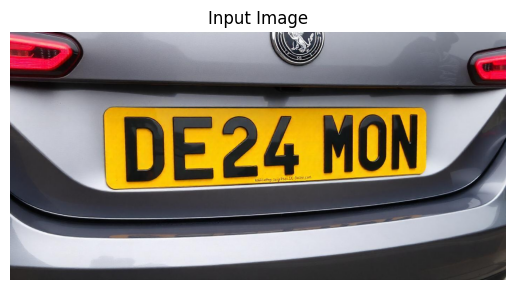

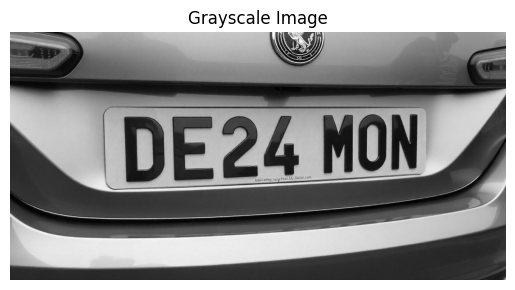

 Haar Cascade file found.
 Haar Cascade loaded successfully.


In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Input Image")
plt.axis('off')
plt.show()


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

cascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml"
cascade_file = "haarcascade_russian_plate_number.xml"

if not os.path.exists(cascade_file):
    urllib.request.urlretrieve(cascade_url, cascade_file)
    print(" Haar Cascade downloaded successfully.")
else:
    print(" Haar Cascade file found.")

plate_cascade = cv2.CascadeClassifier(cascade_file)

if plate_cascade.empty():
    raise IOError(" Haar Cascade failed to load. Check file path or download again.")
else:
    print(" Haar Cascade loaded successfully.")

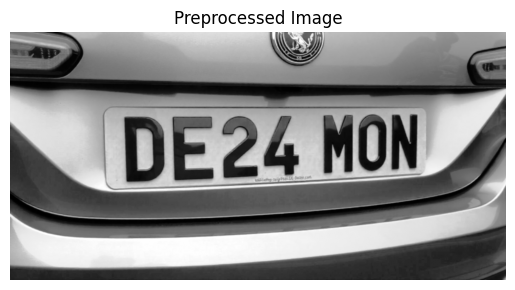

Detected 0 plate(s).


In [9]:
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)
gray_eq = cv2.equalizeHist(gray_blur)

plt.imshow(gray_eq, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

plates = plate_cascade.detectMultiScale(gray_eq, scaleFactor=1.1, minNeighbors=5)

print(f"Detected {len(plates)} plate(s).")

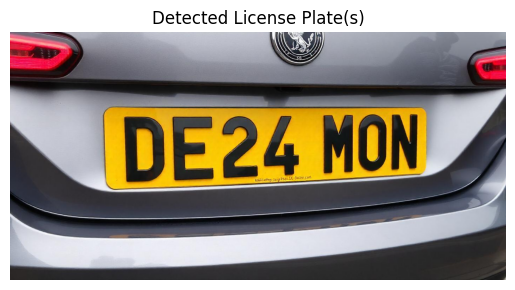

In [10]:
output_img = img_rgb.copy()

for (x, y, w, h) in plates:
    cv2.rectangle(output_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plate_region = img[y:y+h, x:x+w]
    cv2.imwrite(f"plate_{x}_{y}.png", plate_region)  # Save cropped plate image

plt.imshow(output_img)
plt.title("Detected License Plate(s)")
plt.axis('off')
plt.show()